# Week 10: Data exploration & Replication of baseline method

In [4]:
# Import necessary packages
import numpy
import pandas
import matplotlib.pyplot as plt
import sklearn
import nltk

In [5]:
# Read in the data
df_attributes = pandas.read_csv('DATA/attributes.csv')
df_products = pandas.read_csv('DATA/product_descriptions.csv')
df_train = pandas.read_csv('DATA/train.csv', encoding='latin1')
df_test = pandas.read_csv('DATA/test.csv', encoding='latin1')

In [6]:
# Data exploration
print(df_train.info())
print(df_train.shape)
print(len(df_train['product_title'].unique()))
print(df_train['product_title'].value_counts().head(10))
print(df_train['relevance'].mean(), df_train['relevance'].median(), df_train['relevance'].std())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB
None
(74067, 5)
53489
product_title
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)                                                        

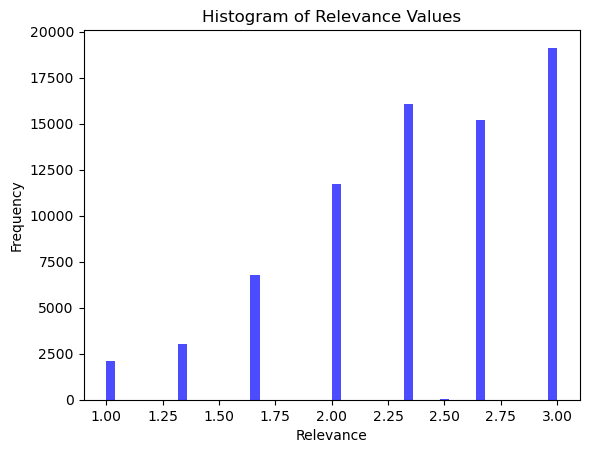

In [7]:
# Make a histogram of the relevance values
plt.hist(df_train['relevance'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Relevance Values')
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Find the brand names
print(df_attributes['product_uid'].value_counts().head(5))
filtered_df = df_attributes[df_attributes["name"].str.contains('Brand Name', na=False)]
print(filtered_df["value"].unique())
print(filtered_df["value"].value_counts().head(10))

product_uid
195932.0    88
100532.0    80
119037.0    79
186482.0    79
144095.0    78
Name: count, dtype: int64
['Simpson Strong-Tie' 'BEHR Premium Textured DeckOver' 'STERLING' ...
 'Woolite' "Durham's Rock Hard" 'Variflex']
value
Unbranded                     2954
Hampton Bay                   1723
KOHLER                        1389
Everbilt                      1381
Home Decorators Collection    1275
GE                             987
Prime-Line                     931
Crown Bolt                     878
Delta                          853
DEWALT                         675
Name: count, dtype: int64


In [11]:
# Baseline model from Yao-Jen Chang
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('DATA/test.csv', encoding="ISO-8859-1")
# df_attr = pd.read_csv('DATA/attributes.csv')
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')

num_train = df_train.shape[0]

def str_stemmer(s):
	return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
	return sum(int(str2.find(word)>=0) for word in str1.split())


df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

df_all['search_term'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title']+"\t"+df_all['product_description']

df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

df_all = df_all.drop(['search_term','product_title','product_description','product_info'],axis=1)

df_train = df_all.iloc[:num_train]
df_test = df_all.iloc[num_train:]
id_test = df_test['id']

y_train = df_train['relevance'].values
X_train = df_train.drop(['id','relevance'],axis=1).values
X_test = df_test.drop(['id','relevance'],axis=1).values

print(df_train.head())
print(df_test.head())

# rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
# clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

   id  product_uid  relevance  len_of_query  word_in_title  \
0   2       100001       3.00             2              1   
1   3       100001       2.50             2              1   
2   9       100002       3.00             2              1   
3  16       100005       2.33             3              1   
4  17       100005       2.67             3              3   

   word_in_description  
0                    1  
1                    1  
2                    1  
3                    1  
4                    2  
       id  product_uid  relevance  len_of_query  word_in_title  \
74067   1       100001        NaN             3              0   
74068   4       100001        NaN             3              1   
74069   5       100001        NaN             3              1   
74070   6       100001        NaN             3              2   
74071   7       100001        NaN             4              2   

       word_in_description  
74067                    1  
74068                 

# Week 11

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Adjusted baseline model
stemmer = SnowballStemmer('english')

# Read in the data
df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('DATA/test.csv', encoding="ISO-8859-1")
# df_attr = pd.read_csv('DATA/attributes.csv')
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')

num_train = df_train.shape[0]

# Function to stem words and find common words
def str_stemmer(s):
	return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
	return sum(int(str2.find(word)>=0) for word in str1.split())

# Concatenate train and test data
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

df_all['search_term'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title']+"\t"+df_all['product_description']

df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

df_all = df_all.drop(['search_term','product_title','product_description','product_info'],axis=1)

df_train = df_all.iloc[:num_train]
df_test = df_all.iloc[num_train:]
id_test = df_test['id']

# Split the training data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['id','relevance'],axis=1).values, df_train['relevance'].values, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print the RMSE
print("RMSE: ", root_mean_squared_error(y_test, y_pred))

# pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

RMSE:  0.4817214529959809


In [ ]:
# Adjusted baseline model (without stemming)
stemmer = SnowballStemmer('english')

# Read in the data
df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('DATA/test.csv', encoding="ISO-8859-1")
# df_attr = pd.read_csv('DATA/attributes.csv')
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')

num_train = df_train.shape[0]

# Function to stem words and find common words
def str_stemmer(s):
	return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
	return sum(int(str2.find(word)>=0) for word in str1.split())

# Concatenate train and test data
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

df_all['search_term'] = df_all['search_term'].astype(str)
df_all['product_title'] = df_all['product_title'].astype(str)
df_all['product_description'] = df_all['product_description'].astype(str)

df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title']+"\t"+df_all['product_description']

df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

df_all = df_all.drop(['search_term','product_title','product_description','product_info'],axis=1)

df_train = df_all.iloc[:num_train]
df_test = df_all.iloc[num_train:]
id_test = df_test['id']

# Split the training data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['id','relevance'],axis=1).values, df_train['relevance'].values, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print the RMSE
print("RMSE: ", root_mean_squared_error(y_test, y_pred))

RMSE:  0.512613133984399


## 11.2 Improving the matching

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Read in the data
df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')

df_all = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')

# Select relevant text features for TF-IDF
text_features = df_all[['search_term', 'product_title', 'product_description']].fillna("")

# Apply TF-IDF to capture text importance
vectorizer = TfidfVectorizer(max_features=2500, stop_words='english', lowercase=True, min_df=4)
tfidf_matrix = vectorizer.fit_transform(text_features['search_term'] + " " + text_features['product_title'] + " " + text_features['product_description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=vectorizer.get_feature_names_out())

# Concatenate TF-IDF features with original numerical features
df_all_tfidf = pd.concat([df_all.drop(['search_term', 'product_title', 'product_description'], axis=1), tfidf_df], axis=1)

# Split the training data into training and test sets with TF-IDF features
X_train, X_test, y_train, y_test = train_test_split(df_all_tfidf.drop(['id', 'relevance'], axis=1), df_all_tfidf['relevance'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print the RMSE with TF-IDF
print("RMSE after TF-IDF: ", root_mean_squared_error(y_test, y_pred))


c:\Users\sanna\anaconda3\envs\DS3\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\sanna\anaconda3\envs\DS3\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RMSE after TF-IDF:  0.5225794736088272


In [ ]:
from sklearn.metrics import jaccard_score

# Create a function to calculate Jaccard Similarity
def jaccard_similarity(str1, str2):
    set1 = set(str1.lower().split())
    set2 = set(str2.lower().split())
    return len(set1 & set2) / len(set1 | set2) if (set1 | set2) else 0

# Read in the data
df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')
df_all = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')

# Calculate Jaccard Similarity features
df_all['jaccard_title'] = df_all.apply(lambda x: jaccard_similarity(str(x['search_term']), str(x['product_title'])), axis=1)
df_all['jaccard_description'] = df_all.apply(lambda x: jaccard_similarity(str(x['search_term']), str(x['product_description'])), axis=1)

# Split the dataset, including Jaccard features
X_train, X_test, y_train, y_test = train_test_split(
    df_all.drop(['id', 'relevance', 'search_term', 'product_title', 'product_description'], axis=1), 
    df_all['relevance'], 
    test_size=0.2, 
    random_state=42
)

# Retrain the model with Jaccard features
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print the RMSE with Jaccard features
print("RMSE after Jaccard Similarity: ", root_mean_squared_error(y_test, y_pred))

RMSE after Jaccard Similarity:  0.5049099506146119


In [ ]:
# Read in the data
df_train = pd.read_csv('DATA/train.csv', encoding="ISO-8859-1")
df_pro_desc = pd.read_csv('DATA/product_descriptions.csv')
df_all = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')

# Function for Word Order Importance
def word_order_importance(search_term, product_title):
    search_words = search_term.lower().split()
    title_words = product_title.lower().split()
    
    match_count = 0
    for i in range(len(search_words) - 1):  # Loop door woordparen
        search_pair = " ".join(search_words[i:i+2])  # Maak een tweewoord-combinatie
        title_text = " ".join(title_words)  # Zet de producttitel als string
        if search_pair in title_text:
            match_count += 1  # Verhoog de score als de woordpaar exact matcht

    return match_count / max(1, len(search_words) - 1)  # Normaliseren op lengte zoekterm

df_all['word_order_score'] = df_all.apply(lambda x: word_order_importance(str(x['search_term']), str(x['product_title'])), axis=1)

# Split the dataset, including Word Order Score
X_train, X_test, y_train, y_test = train_test_split(
    df_all.drop(['id', 'relevance', 'search_term', 'product_title', 'product_description'], axis=1), 
    df_all['relevance'], 
    test_size=0.2, 
    random_state=42
)

# Retrain the model with Word Order Score
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print the RMSE with word order importance
print("RMSE after word order importance: ", root_mean_squared_error(y_test, y_pred))

RMSE after word order importance:  0.515381969586403
